In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from scipy.stats.stats import ttest_ind

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

perf_df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

In [4]:
perf_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

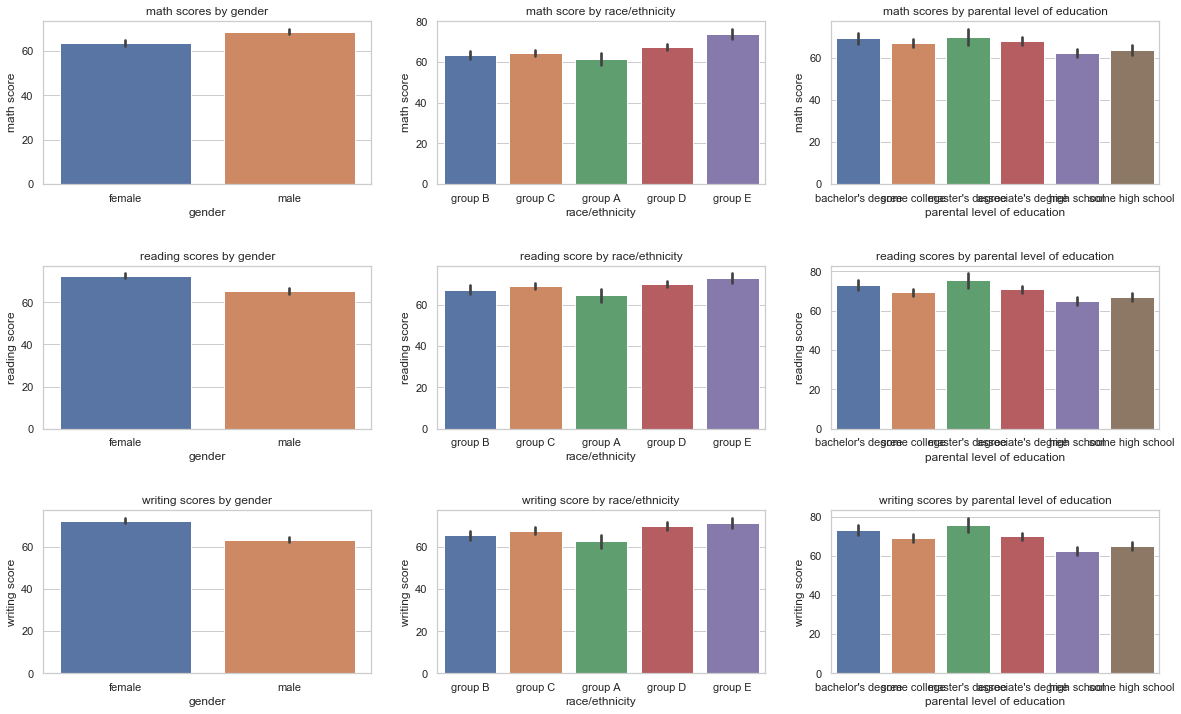

In [33]:
plt.figure(figsize=(20,12))
plt.subplots_adjust(hspace=0.5)

#math
plt.subplot(3,3,1)
sns.barplot(perf_df["gender"], perf_df["math score"])
plt.title("math scores by gender")

plt.subplot(3,3,2)
sns.barplot(perf_df["race/ethnicity"], perf_df["math score"])
plt.title("math score by race/ethnicity")

plt.subplot(3,3,3)
sns.barplot(perf_df["parental level of education"], perf_df["math score"])
plt.title("math scores by parental level of education")


#reading
plt.subplot(3,3,4)
sns.barplot(perf_df["gender"], perf_df["reading score"])
plt.title("reading scores by gender")

plt.subplot(3,3,5)
sns.barplot(perf_df["race/ethnicity"], perf_df["reading score"])
plt.title("reading score by race/ethnicity")

plt.subplot(3,3,6)
sns.barplot(perf_df["parental level of education"], perf_df["reading score"])
plt.title("reading scores by parental level of education")


#writing
plt.subplot(3,3,7)
sns.barplot(perf_df["gender"], perf_df["writing score"])
plt.title("writing scores by gender")

plt.subplot(3,3,8)
sns.barplot(perf_df["race/ethnicity"], perf_df["writing score"])
plt.title("writing score by race/ethnicity")

plt.subplot(3,3,9)
sns.barplot(perf_df["parental level of education"], perf_df["writing score"])
plt.title("writing scores by parental level of education")
plt.show()



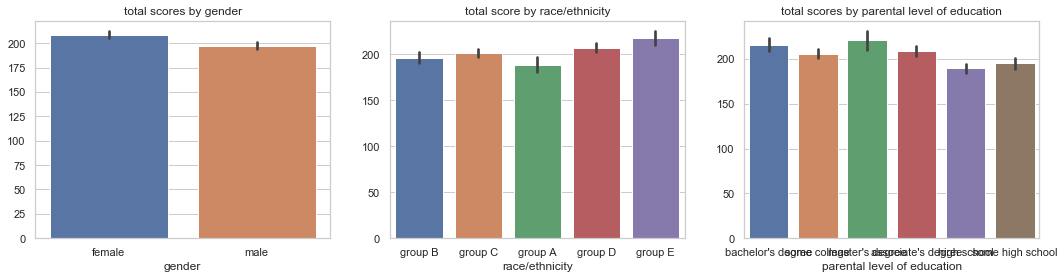

In [26]:
#3 subjects totaled

plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.barplot(perf_df["gender"], perf_df["math score"] + perf_df['reading score'] + perf_df["writing score"])
plt.title("total scores by gender")

plt.subplot(1,3,2)
sns.barplot(perf_df["race/ethnicity"], perf_df["math score"] + perf_df['reading score'] + perf_df["writing score"])
plt.title("total score by race/ethnicity")

plt.subplot(1,3,3)
sns.barplot(perf_df["parental level of education"], perf_df["math score"] + perf_df['reading score'] + perf_df["writing score"])
plt.title("total scores by parental level of education")
plt.show()

In [51]:
#gender stats
print(perf_df.groupby("gender").mean()[["math score", "reading score", "writing score"]])

ttest_ind(perf_df[perf_df.gender == "female"][["math score", "reading score", "writing score"]],
          perf_df[perf_df.gender == "male"][["math score", "reading score", "writing score"]])

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


Ttest_indResult(statistic=array([-5.38324587,  7.95930801,  9.97955791]), pvalue=array([9.12018555e-08, 4.68053874e-15, 2.01987771e-22]))

Females scored statistically significantly better on reading and writing (p-values 4.7e-15 and 2.0e-22 respectively), and males scored better on math (p-value 9.1e-8).  

In [54]:
#race/ethnicity stats
ethnicities = perf_df["race/ethnicity"].unique()
grouped_df = perf_df.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(ethnicities)):
        for j in range(i+1, len(ethnicities)):
            print(
                "t-test between groups {0} and {1}:".format(ethnicities[i], ethnicities[j]))
            print(ttest_ind(
                perf_df[perf_df["race/ethnicity"]
                           == ethnicities[i]][var],
                perf_df[perf_df["race/ethnicity"] == ethnicities[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

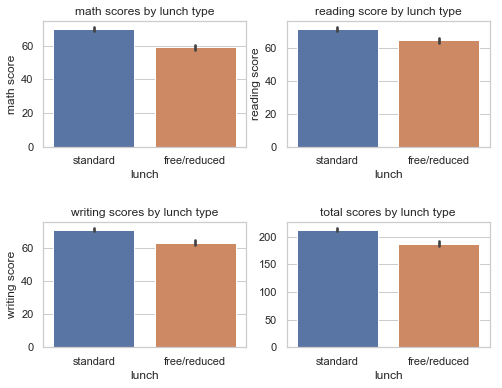

In [42]:
plt.figure(figsize=(8,6))
plt.subplots_adjust(hspace=0.6)

plt.subplot(2,2,1)
sns.barplot(perf_df["lunch"], perf_df["math score"])
plt.title("math scores by lunch type")

plt.subplot(2,2,2)
sns.barplot(perf_df["lunch"], perf_df["reading score"])
plt.title("reading score by lunch type")

plt.subplot(2,2,3)
sns.barplot(perf_df["lunch"], perf_df["writing score"])
plt.title("writing scores by lunch type")

plt.subplot(2,2,4)
sns.barplot(perf_df["lunch"], perf_df["math score"] + perf_df['reading score'] + perf_df["writing score"])
plt.title("total scores by lunch type")

plt.show()

Receiving free/reduced lunch is an indicator that the student might live in a food insecure household. And insufficient nutrition has been shown to have adverse effects on performance. 

3. Does the test preparation course seem to have an effect on the exam performances?

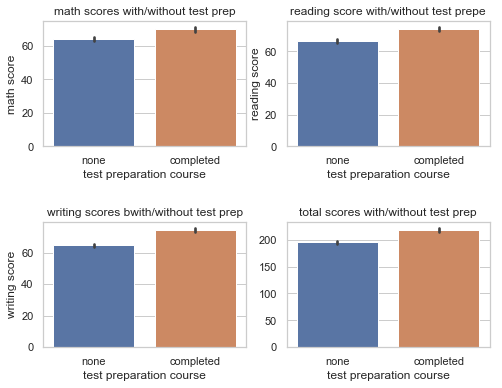

In [44]:
plt.figure(figsize=(8,6))
plt.subplots_adjust(hspace=0.6)

plt.subplot(2,2,1)
sns.barplot(perf_df["test preparation course"], perf_df["math score"])
plt.title("math scores with/without test prep")

plt.subplot(2,2,2)
sns.barplot(perf_df["test preparation course"], perf_df["reading score"])
plt.title("reading score with/without test prepe")

plt.subplot(2,2,3)
sns.barplot(perf_df["test preparation course"], perf_df["writing score"])
plt.title("writing scores bwith/without test prep")

plt.subplot(2,2,4)
sns.barplot(perf_df["test preparation course"], perf_df["math score"] + perf_df['reading score'] + perf_df["writing score"])
plt.title("total scores with/without test prep")

plt.show()

In [56]:
#test prep ttest
ttest_ind(perf_df[perf_df["test preparation course"] == "completed"][["math score", "reading score", "writing score"]],
          perf_df[perf_df["test preparation course"] == "none"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([ 5.70461642,  7.87166354, 10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

Yes the test prep course improved performance significantly (p-values near 0)

4. Which 2 exam scores are most correlated with each other?

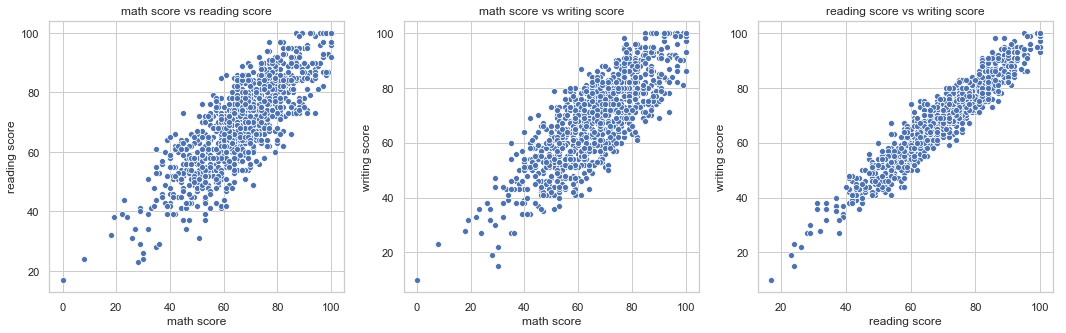

In [62]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.scatterplot(perf_df["math score"], perf_df["reading score"])
plt.title("math score vs reading score")

plt.subplot(1,3,2)
sns.scatterplot(perf_df["math score"], perf_df["writing score"])
plt.title("math score vs writing score")

plt.subplot(1,3,3)
sns.scatterplot(perf_df["reading score"], perf_df["writing score"])
plt.title("reading score vs writing score")

plt.show()

In [64]:
perf_df[["math score", "reading score", "writing score"]].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


reading & writing have a correlation of 0.95